# THIS CODE IS RUN IN KAGGLE MNIST DATA SET (DIGIT RECOGNITION DATA SET)

In [21]:
# df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
df = pd.read_csv('MNIST_DATA_SET_train.csv')

In [9]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17524,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import matplotlib.pyplot as plt 

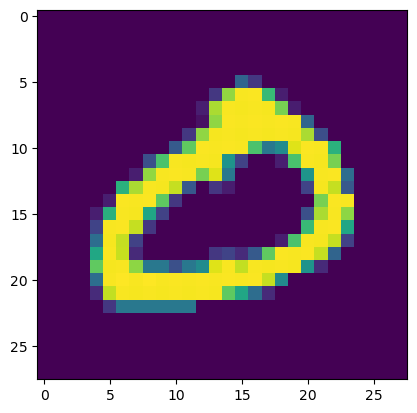

In [13]:
plt.imshow(df.iloc[4888,1:].values.reshape(28,28))

In [15]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [160]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier()

In [163]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [164]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

20.989001035690308


In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [167]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [168]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [169]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [170]:
x_train_trf.shape

(33600, 100)

In [171]:
knn = KNeighborsClassifier()

In [172]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [173]:
y_pred = knn.predict(x_test_trf)

In [174]:
accuracy_score(y_test,y_pred)

0.9545238095238096

In [175]:
for i in range(1, 785):
    pca = PCA(n_components = 100)
    
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    
    y_pred = knn.predict(x_test_trf)

    print(accuracy_score(y_test,y_pred))

0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9545238095238096


KeyboardInterrupt: 

In [176]:
x_train_trf

array([[-2.71863359e+00, -4.89831375e-01,  1.13550099e+00, ...,
        -8.29194506e-01, -3.92575228e-01, -1.30623402e-02],
       [-6.76978273e-01, -6.75363132e+00, -2.33590128e+00, ...,
        -1.22371407e+00, -6.57153602e-02, -1.36172201e+00],
       [-3.03323296e+00,  6.50981307e+00,  7.49181347e+00, ...,
        -1.14446549e+00,  7.45613883e-01,  1.17621092e-01],
       ...,
       [ 2.14883891e+00,  7.80785425e-01, -7.47370603e-01, ...,
        -7.47779692e-01, -1.63132445e-01,  1.22471803e+00],
       [ 1.05957258e+00,  9.47667628e-01,  3.94973620e+00, ...,
        -1.04928469e+00,  1.26799197e-02, -4.86044466e-01],
       [ 1.77025848e+01,  1.96187732e+00, -4.94352518e+00, ...,
         2.88893857e+00, -5.19035797e-01, -7.42648539e-01]])

# Tranforming in 2D

In [177]:
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [178]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x= x_train_trf[:,0],
                y=x_train_trf[:,1],
                 color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
)
fig.show()

# Tranforming in 3D

In [179]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [180]:
# x_train_trf

In [181]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1],z=x_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [182]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023399, 26.74459604])

In [183]:
pca.components_
# Eigen vectors

array([[ 2.24737228e-18,  8.14868482e-19,  3.33372563e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.19166905e-18, -5.81196156e-18,  2.56523590e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.66267485e-17,  1.73785746e-17, -1.39038655e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [184]:
pca.components_.shape

(3, 784)

In [185]:
# For percentage calculation in pca 
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926968, 3.80423899])

In [186]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [187]:
pca.components_.shape

(784, 784)

In [188]:
pca.explained_variance_.shape

(784,)

In [189]:
# For percentage calculation in pca 
pca.explained_variance_ratio_*100

array([5.78519225e+00, 4.14926968e+00, 3.80423901e+00, 2.96626277e+00,
       2.58156168e+00, 2.25498018e+00, 1.97306802e+00, 1.77527998e+00,
       1.56865066e+00, 1.43606328e+00, 1.37025484e+00, 1.22725500e+00,
       1.14691200e+00, 1.12302739e+00, 1.05852885e+00, 1.01993106e+00,
       9.57676152e-01, 9.42708817e-01, 9.12489429e-01, 8.90170190e-01,
       8.39940495e-01, 8.20063196e-01, 7.85303229e-01, 7.56739707e-01,
       7.37261022e-01, 7.01884653e-01, 6.97919728e-01, 6.71104483e-01,
       6.39845030e-01, 6.30337291e-01, 6.15350848e-01, 6.02388659e-01,
       5.83673972e-01, 5.78547759e-01, 5.72333148e-01, 5.46399774e-01,
       5.43207369e-01, 5.28172755e-01, 5.13381744e-01, 4.94015474e-01,
       4.87671103e-01, 4.81978768e-01, 4.68204430e-01, 4.59342487e-01,
       4.57660834e-01, 4.49219022e-01, 4.44682221e-01, 4.41540749e-01,
       4.35111936e-01, 4.32032928e-01, 4.21808870e-01, 4.18243127e-01,
       4.07994349e-01, 4.02004913e-01, 3.98335855e-01, 3.94598812e-01,
      

In [190]:
#ye pahle 1st position, 
#then sum of first and second position -> 9.9344(second position),
#sum(5.78519225e+00, 4.14926968e+00, 3.80423901e+00) -> third position(13.73870094,)


np.cumsum(pca.explained_variance_ratio_*100)

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

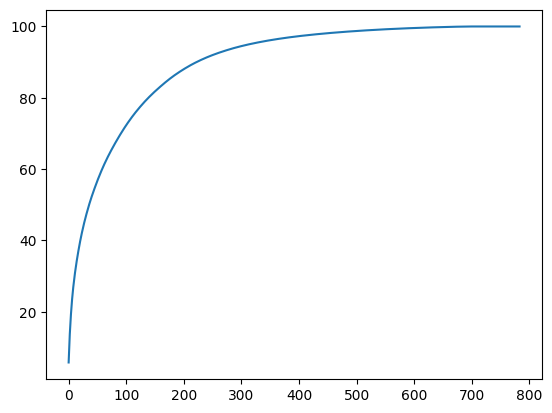

In [191]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))